## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

There is 1 csv file in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/result-students/results.csv
/kaggle/input/student-exam-results-dataset/results.csv


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/results.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# results.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/result-students/results.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'results.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 10 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,SL_no.,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


Distribution graphs (histogram/bar graph) of sampled columns:

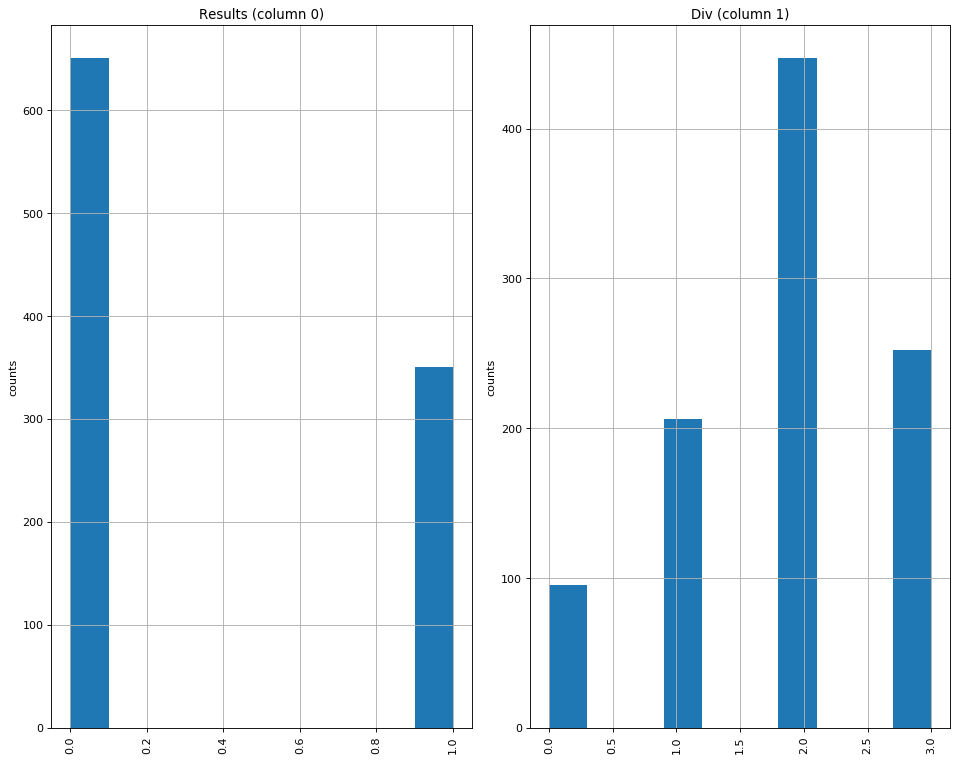

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

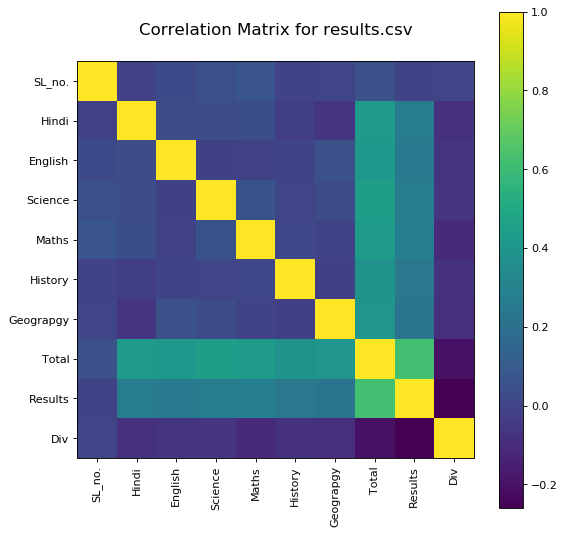

In [9]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

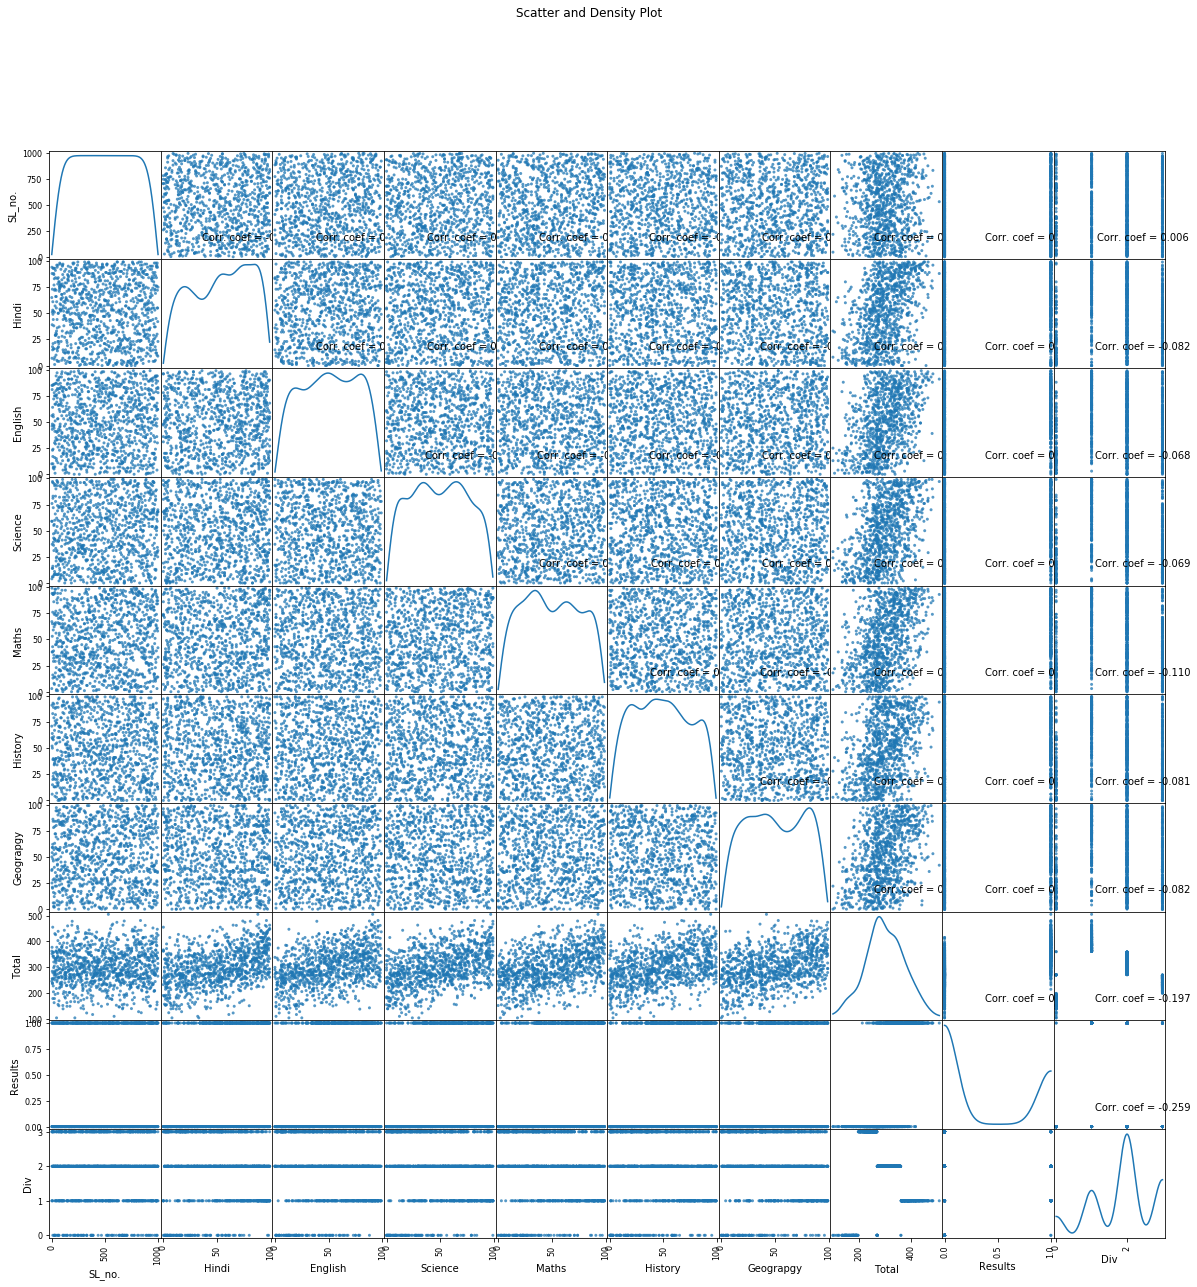

In [10]:
plotScatterMatrix(df1, 20, 10)

In [11]:
df1.head(100)

,SL_no.,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3
...,...,...,...,...,...,...,...,...,...,...
95,95,82,39,28,3,8,72,232,0,3
96,96,68,40,71,97,20,80,376,1,1
97,97,28,98,47,61,35,19,288,0,2
98,98,78,83,41,38,90,7,337,1,2


In [12]:
df1.shape

(1000, 10)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
SL_no.       1000 non-null int64
Hindi        1000 non-null int64
English      1000 non-null int64
Science      1000 non-null int64
Maths        1000 non-null int64
History      1000 non-null int64
Geograpgy    1000 non-null int64
Total        1000 non-null int64
Results      1000 non-null int64
Div          1000 non-null int64
dtypes: int64(10)
memory usage: 78.2 KB


In [14]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [15]:
df1=df1.drop_duplicates(keep='first')

In [16]:
df1.isnull().sum()

SL_no.       0
Hindi        0
English      0
Science      0
Maths        0
History      0
Geograpgy    0
Total        0
Results      0
Div          0
dtype: int64

In [17]:
df1.describe()

,SL_no.,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,51.645000,50.110000,49.440000,49.553000,49.03400,50.028000,299.810000,0.350000,1.856000
std,288.819436,29.471912,28.048505,28.921114,28.632447,28.76975,28.710268,71.865239,0.477208,0.904479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,103.000000,0.000000,0.000000
25%,249.750000,26.000000,26.000000,25.000000,25.750000,24.00000,26.000000,254.000000,0.000000,1.000000
50%,499.500000,53.000000,50.500000,50.000000,49.000000,49.00000,49.000000,296.000000,0.000000,2.000000
75%,749.250000,77.000000,75.000000,73.250000,74.000000,73.25000,75.000000,349.250000,1.000000,3.000000
max,999.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,505.000000,1.000000,3.000000


In [18]:
df1['Div'].value_counts()

2    447
3    252
1    206
0     95
Name: Div, dtype: int64

In [19]:
columns_to_drop = ['Div','SL_no.','Results']
X=df1.drop(columns=columns_to_drop,axis=1)
Y=df1['Div']

In [20]:
print(X)

     Hindi  English  Science  Maths  History  Geograpgy  Total
0       65       10       59      3       71         37    245
1       94       56        4     67       91         50    362
2        7       85       76     99       60         25    352
3       88       46       59     94       52         38    377
4       39       81       37     38        6         54    255
..     ...      ...      ...    ...      ...        ...    ...
995     55       89       68     58       13         13    296
996     42       62       25     87       51         68    335
997      9       83       70     14       11         78    265
998     23       82       31     42       84         52    314
999     75       78       68     33       79         91    424

[1000 rows x 7 columns]


In [21]:
print(Y)

0      3
1      1
2      2
3      1
4      3
      ..
995    2
996    2
997    3
998    2
999    1
Name: Div, Length: 1000, dtype: int64


In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(1000, 7) (800, 7) (200, 7)


In [24]:
k_range=range(1,20)
scores=[]
for k in k_range:
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,Y_train)
  accuracy=model.score(X_test,Y_test)
  scores.append(accuracy)
  print('k= %d Accuracy= %.2f%%' % (k,accuracy*100))

k= 1 Accuracy= 84.00%
k= 2 Accuracy= 82.00%
k= 3 Accuracy= 89.00%
k= 4 Accuracy= 90.00%
k= 5 Accuracy= 90.00%
k= 6 Accuracy= 88.50%
k= 7 Accuracy= 89.00%
k= 8 Accuracy= 90.00%
k= 9 Accuracy= 92.00%
k= 10 Accuracy= 90.50%
k= 11 Accuracy= 90.00%
k= 12 Accuracy= 89.50%
k= 13 Accuracy= 89.50%
k= 14 Accuracy= 89.50%
k= 15 Accuracy= 88.50%
k= 16 Accuracy= 90.00%
k= 17 Accuracy= 88.50%
k= 18 Accuracy= 90.50%
k= 19 Accuracy= 89.50%


Text(0, 0.5, 'Accuracy')

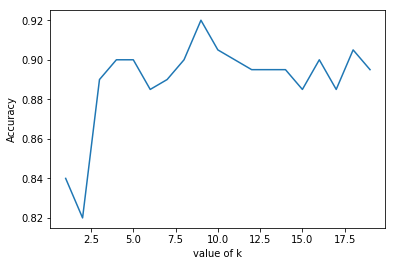

In [25]:
plt.plot(k_range,scores)
plt.xlabel("value of k")
plt.ylabel("Accuracy")

In [26]:
 model=KNeighborsClassifier(n_neighbors=9,metric='euclidean')
 model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [27]:
accuracy=model.score(X_test,Y_test)
print(accuracy)

0.92


In [28]:
accuracy=model.score(X_train,Y_train)
print(accuracy)

0.93


In [29]:
import pickle

In [30]:
pickle.dump(model,open('/kaggle/working/Student_performance_model','wb'))

In [31]:
columns_to_drop = ['SL_no.','Results','Total','Div']
X1=df1.drop(columns=columns_to_drop,axis=1)
Y1=df1['Results']

In [32]:
print(X1)

     Hindi  English  Science  Maths  History  Geograpgy
0       65       10       59      3       71         37
1       94       56        4     67       91         50
2        7       85       76     99       60         25
3       88       46       59     94       52         38
4       39       81       37     38        6         54
..     ...      ...      ...    ...      ...        ...
995     55       89       68     58       13         13
996     42       62       25     87       51         68
997      9       83       70     14       11         78
998     23       82       31     42       84         52
999     75       78       68     33       79         91

[1000 rows x 6 columns]


In [33]:
print(Y1)

0      0
1      1
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    1
Name: Results, Length: 1000, dtype: int64


In [34]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,stratify=Y1,random_state=2)

print(X1.shape,X1_train.shape,X1_test.shape)

(1000, 6) (800, 6) (200, 6)


In [35]:
k_range1=range(1,20)
scores1=[]
for k in k_range1:
  model1=KNeighborsClassifier(n_neighbors=k)
  model1.fit(X1_train,Y1_train)
  accuracy=model1.score(X1_test,Y1_test)
  scores1.append(accuracy)
  print('k= %d Accuracy= %.2f%%' % (k,accuracy*100))

k= 1 Accuracy= 78.00%
k= 2 Accuracy= 84.00%
k= 3 Accuracy= 85.00%
k= 4 Accuracy= 85.50%
k= 5 Accuracy= 88.50%
k= 6 Accuracy= 89.00%
k= 7 Accuracy= 88.50%
k= 8 Accuracy= 88.50%
k= 9 Accuracy= 86.50%
k= 10 Accuracy= 86.50%
k= 11 Accuracy= 87.00%
k= 12 Accuracy= 87.50%
k= 13 Accuracy= 87.50%
k= 14 Accuracy= 86.00%
k= 15 Accuracy= 87.00%
k= 16 Accuracy= 87.00%
k= 17 Accuracy= 85.50%
k= 18 Accuracy= 86.50%
k= 19 Accuracy= 86.00%


Text(0, 0.5, 'Accuracy')

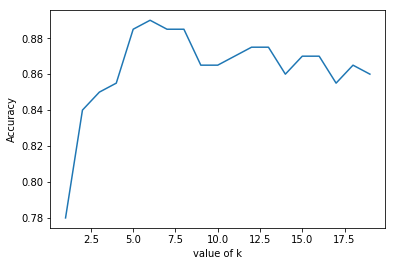

In [36]:
plt.plot(k_range1,scores1)
plt.xlabel("value of k")
plt.ylabel("Accuracy")

In [37]:
 model1=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
 model1.fit(X1_train,Y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [38]:
accuracy=model1.score(X1_test,Y1_test)
print(accuracy)

0.89


In [39]:
accuracy=model1.score(X1_train,Y1_train)
print(accuracy)

0.8975


Pass
2nd Div


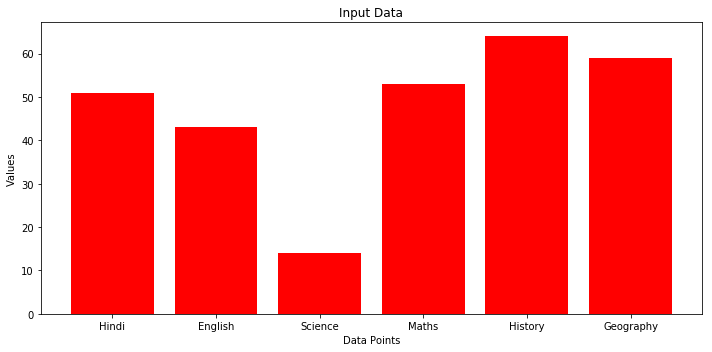

In [64]:
input_data1=(51,43,14,53,64,59)

input_data_as_numpy_array1=np.asarray(input_data1)

input_data_reashaped1=input_data_as_numpy_array1.reshape(1,-1)

prediction1=model1.predict(input_data_reashaped1)


input_data = input_data1
total_sum = 0

for i in input_data:
    total_sum += i
input_data = list(input_data) 
input_data.append(total_sum)
input_data = tuple(input_data)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reashaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reashaped)

if(prediction1[0]==1):
  print('Pass')
  if(prediction[0]==1):
    print('1st div')
  elif(prediction[0]==2):
    print('2nd Div')
  else:
    print('3rd Div ')
else:
  print('fail')


# Plotting
plt.figure(figsize=(10, 5))
#plt.bar(np.arange(len(input_data)), input_data, color='red')
columns = ['Hindi', 'English', 'Science', 'Maths', 'History', 'Geography',]
plt.bar(columns, input_data1, color='red')
plt.title('Input Data')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.xticks(np.arange(len(input_data1)), columns)
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
pickle.dump(model1,open('/kaggle/working/Student_performance_model1','wb'))

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!